<div align="center">
  <h1 align="center">Figure 2: Second level statistical maps</h1>
  <p align="center"><i>Marie E Galteau, 2023</i></p>

  <table align="cener">
    <tr>
    <td><img align="right" src="https://open-neuroscience.com/post/nilearn/featured.png" alt="image" width="150" /></td>
    <td><img align="right" src="https://d33wubrfki0l68.cloudfront.net/e33fd6f372aa5d51e7b0de4bd763bd983251881e/4b0f4/blog/customising-matplotlib/matplot_title_logo.png" alt="image" width="200" /></td>
    </tr>
  </table>
</div>


---

In [5]:
# Import Libraries
import pandas as pd 
import numpy as np
import nibabel as nib
from numpy import savetxt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from nilearn import plotting, image
from nilearn.plotting import plot_img
import matplotlib.gridspec as gridspec
from nilearn.maskers import NiftiMasker

In [6]:
# Save models for glover 

analysis_folder = '/project/4180000.19/multirat_stim/scratch/rabies_test/'

#for dataset in range(20, 23):
    ID = "0"+str(2000+dataset)
    matrix = pd.read_csv(analysis_folder+'/first_level/glover/matrix/matrix_sub-{}00_ses-1.csv'.format(ID))
    matrix_model = matrix.iloc[:, 0]
    savetxt(analysis_folder+'first_level/glover/model/model_sub-{}00_ses-1.csv'.format(ID), matrix_model, delimiter=',')

IndentationError: unexpected indent (3781062035.py, line 6)

In [7]:
# Init var

hrf_path = 'Peak_span'
    # glover
    # spm
    # Two_gammas
    # Peak_span
    
analysis_folder = '/project/4180000.19/multirat_stim/scratch/rabies_test/'
model_path = analysis_folder+f'first_level/{hrf_path}/model/'
matrix_path = analysis_folder+f'first_level/{hrf_path}/matrix/'
z_scores_path = analysis_folder+f'second_level/{hrf_path}/z_score/'
second_level_path = analysis_folder+f'second_level/{hrf_path}/image/'
first_level_path = analysis_folder+f'first_level/'
mask_ROIs_path = analysis_folder+f'ffirst_level/{hrf_path}/mask_ROIs/'

template_folder = '/groupshare/traaffneu/preclinimg/templates/'
template= nib.load(template_folder+'SIGMA_Wistar_Rat_Brain_TemplatesAndAtlases_Version1.1/SIGMA_Rat_Anatomical_Imaging/SIGMA_Rat_Anatomical_InVivo_Template/SIGMA_InVivo_Brain_Template_Masked.nii')                                                                                                                                                                                        
atlas_mask = nib.load(template_folder+'SIGMA_Wistar_Rat_Brain_TemplatesAndAtlases_Version1.1/SIGMA_Rat_Anatomical_Imaging/SIGMA_Rat_Anatomical_InVivo_Template/SIGMA_InVivo_Brain_Mask.nii')
masker = NiftiMasker(mask_img=atlas_mask, standardize=True)

02002


/home/traaffneu/margal/.conda/envs/MultiRatStim/lib/python3.9/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/home/traaffneu/margal/.conda/envs/MultiRatStim/lib/python3.9/site-packages/nilearn/signal.py:64: UserWarning: Standardization of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn(


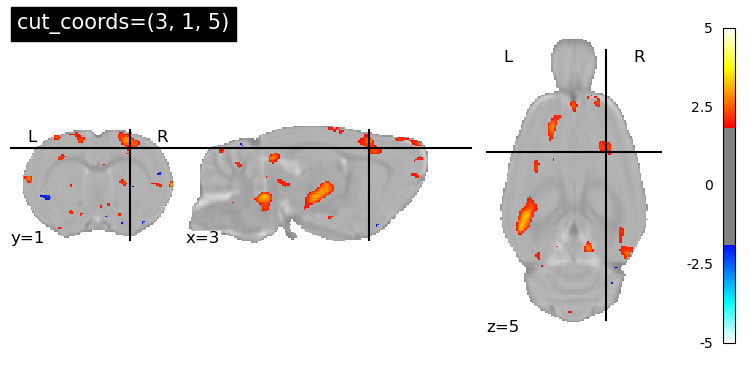

In [24]:
# Plot second level maps

z_scores_path = f'/project/4180000.19/multirat_stim/scratch/rabies_test/second_level/{hrf_path}/z_score/'

for ID in range(2002, 2003):

    subj_num = "0"+str(ID)
    print(subj_num)
    
    sec_z_scores = nib.load(z_scores_path+f'z_score_dataset-0{ID}.nii.gz')
    sec_z_scores = masker.fit_transform(sec_z_scores)                                 

    plot_stat = plotting.plot_stat_map(masker.inverse_transform(sec_z_scores),
                                       bg_img=template,
                                       cut_coords=(3, 1, 5),  #forepaw=(4, 2, 5), hind = (3, 0, 5), visual(0, -7, 4), whiskers(1, -4, 0)
                                       threshold=1.9,
                                       display_mode='ortho',
                                       cbar_tick_format='%.2g',
                                       symmetric_cbar=True,
                                       draw_cross=True,
                                       vmax=5,
                                       black_bg=False)

    plt.savefig(f'/project/4180000.19/multirat_stim/scratch/plots/group_levels/{hrf_path}/group-level_{hrf_path}_dataset-{subj_num}.svg', format='svg', dpi=1200)
    #plt.savefig(f'/project/4180000.19/multirat_stim/scratch/plots/overview/03/groups/1_9_{hrf_path}_map-model_dataset-{subj_num}.svg', format='svg', dpi=1200)
    plt.show()

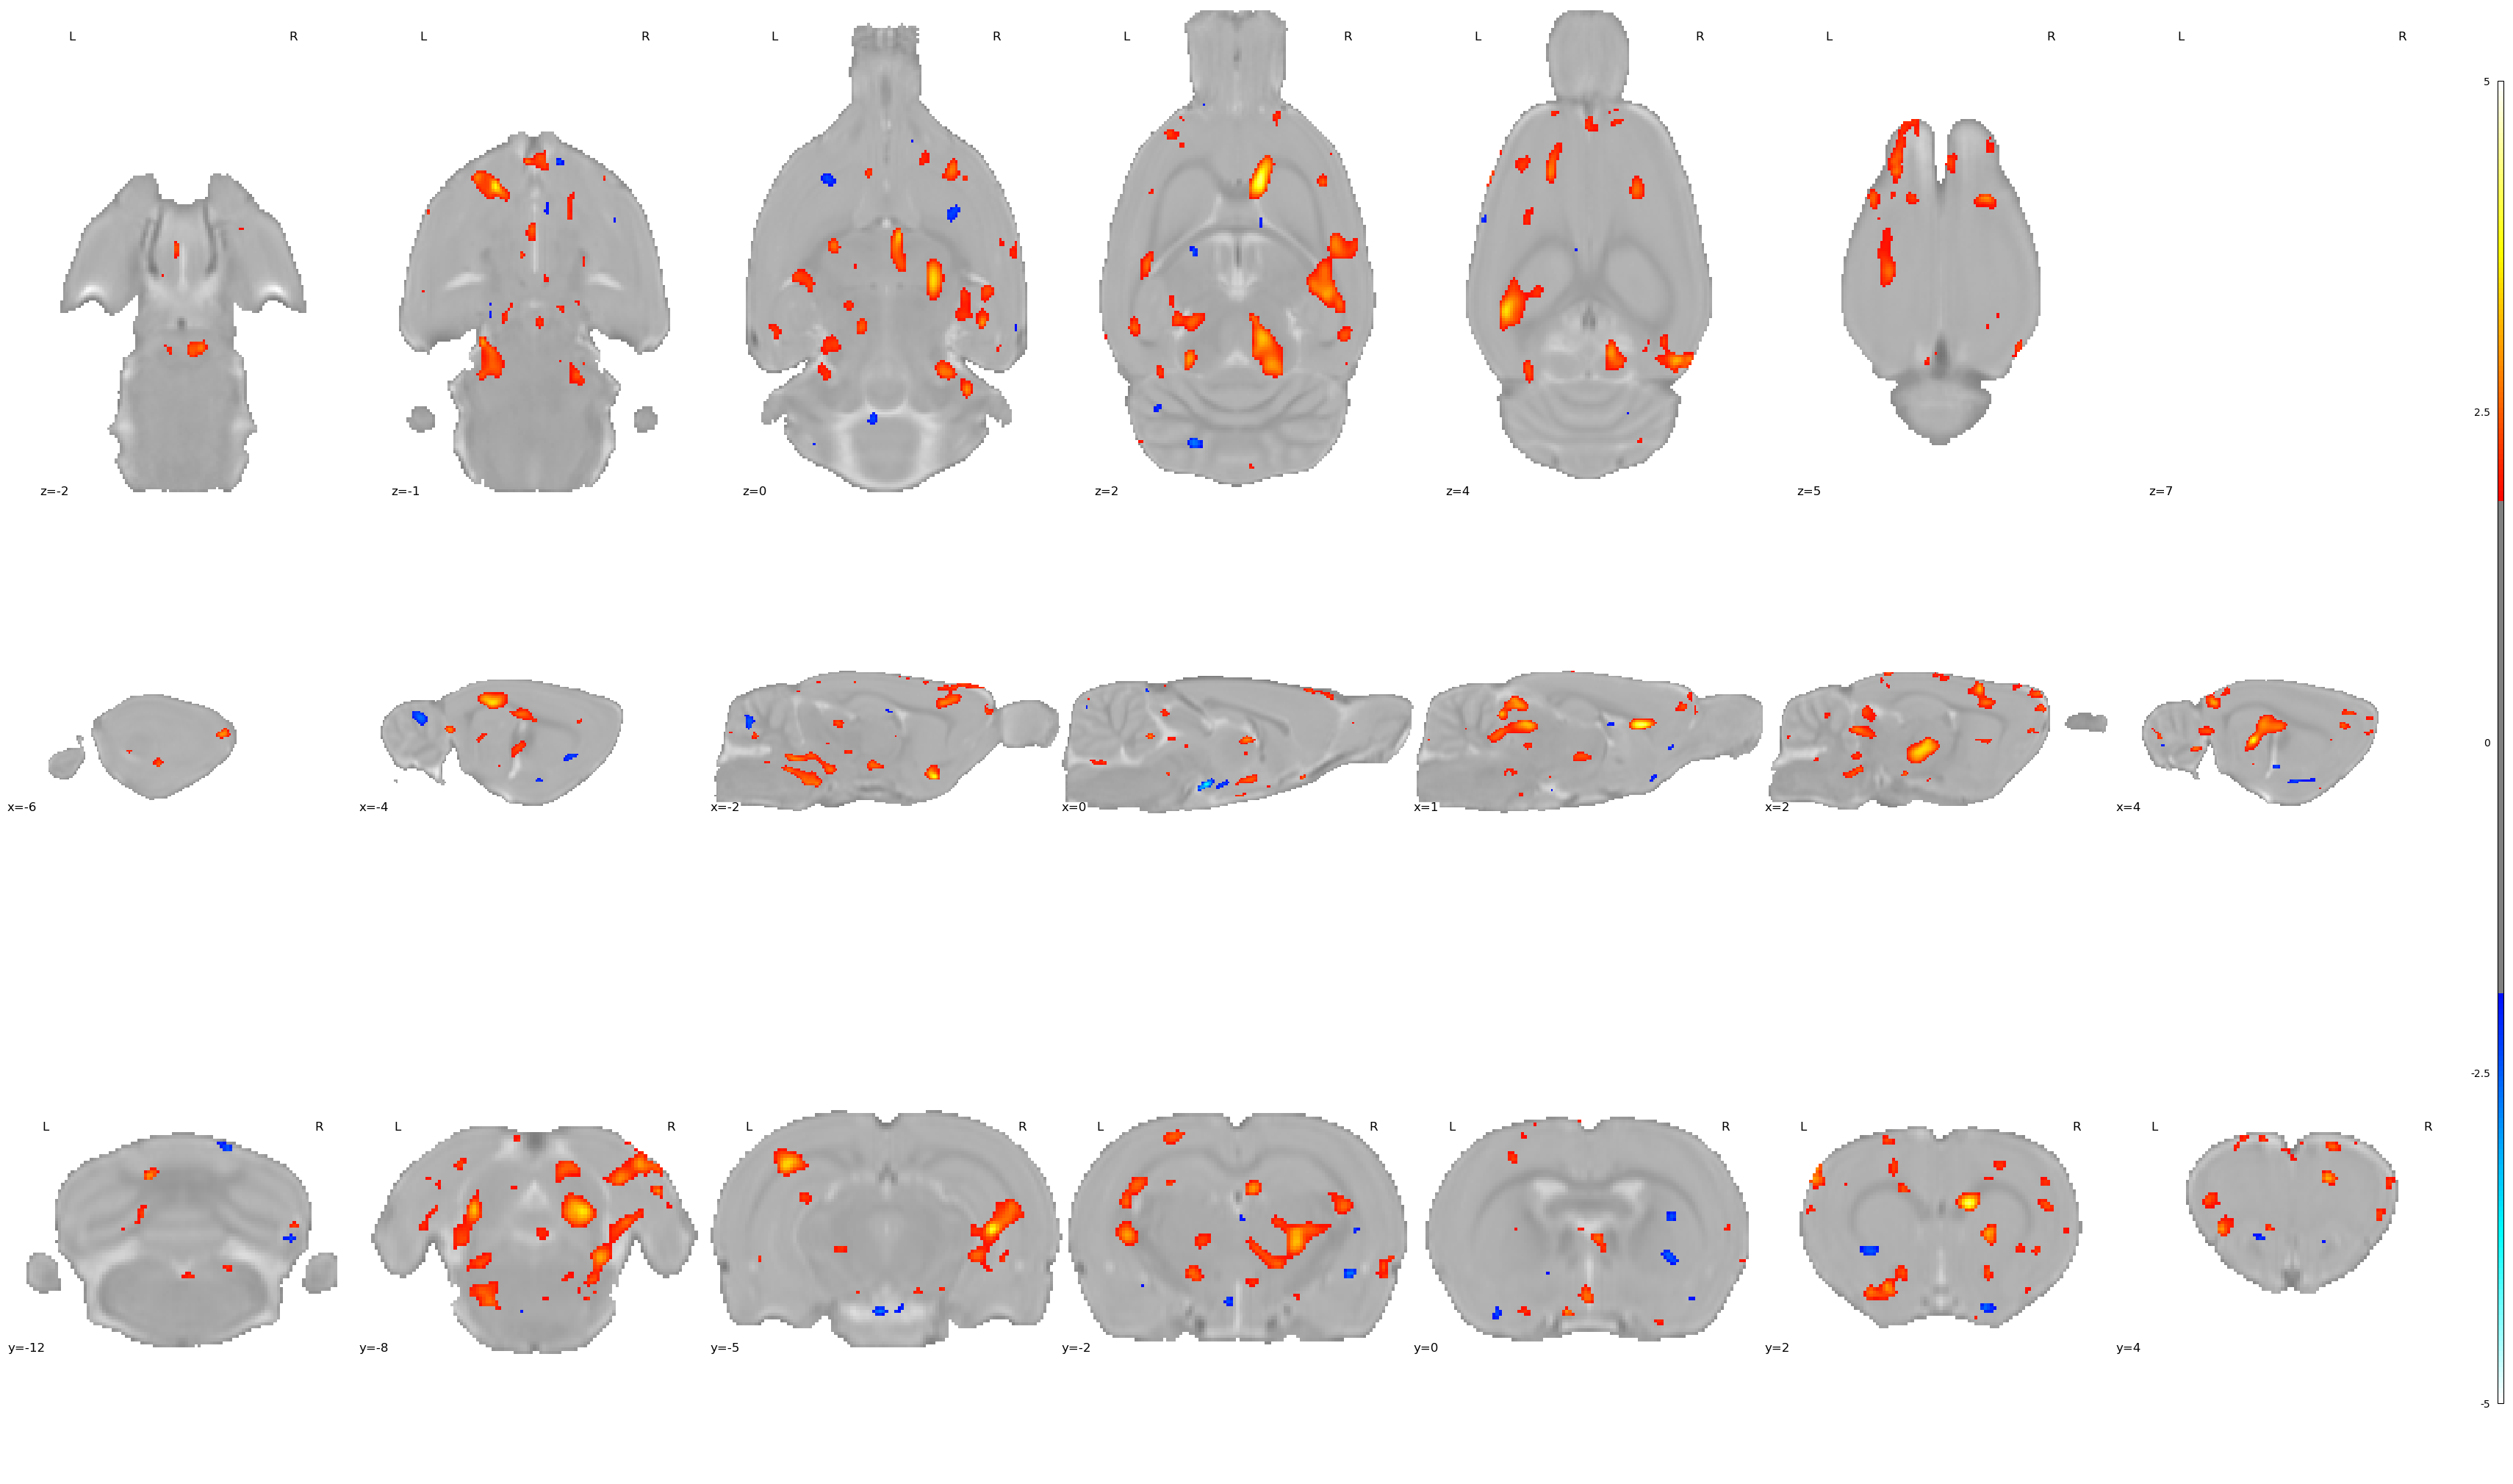

In [18]:

plot_stat = plotting.plot_stat_map(masker.inverse_transform(sec_z_scores),
                                   bg_img=template,
                                   #cut_coords = 15,
                                   #cut_coords = (2 ,2, 5),
                                   threshold=1.9,
                                   display_mode='mosaic',
                                   cbar_tick_format='%.2g',
                                   symmetric_cbar=True,
                                   draw_cross=True,
                                   vmax=5,
                                   black_bg=False) 

#plt.savefig('/project/4180000.19/multirat_stim/scratch/plots/compare_sec_level/glover_map-model_dataset-{}.svg'.format(ID), format='svg', dpi=1200) 
 
plt.show()